In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
mat = pd.read_csv("mat9.csv",header = None)
coef = pd.read_csv("mat10.csv",header = None)
mat1 = np.array(mat)
coef = np.array(coef)
mat = mat1[:,:-1]
ans = mat1[:,-1]
coef = coef[0]
ind = []
m = float(input("Enter value of m: "))
for i in range(mat.shape[0]):
    temp = np.zeros(mat.shape[0])
    temp[i] = 1.0
    temp = np.array([temp])
    mat = np.append(mat,temp.T,axis=1)
    ind.append(mat.shape[1]-1)
    coef = np.append(coef,0)
    if ans[i]<0:
        mat[i,:]=-1*mat[i,:]
        ans[i] = -ans[i]
        mat = np.append(mat,temp.T,axis=1)
        ind[-1] = mat.shape[1]-1
        coef = np.append(coef,-m)
mat = mat.astype(float)
coef = coef.astype(float)

Enter value of m: 1000


In [13]:
coef

array([   -4.,    -1.,     0., -1000.,     0., -1000.])

In [14]:
z = np.dot(coef[ind],mat)
dec = coef - z
print(dec)
print(mat)

[ 7996.  7999. -1000.     0. -1000.     0.]
[[ 7.  2. -1.  1.  0.  0.]
 [ 1.  6. -0. -0. -1.  1.]]


In [9]:
while max(dec)>0:
    incoming = np.where(dec == max(dec))[0][0]
    divider = (mat[:,incoming])
    divider[divider==0] = 10**-8
    incd = (ans/divider)
    incd[divider<0] = 10**12
    outgoing = np.where(incd == min(incd))[0][0]
    ind[outgoing] = incoming
    ans = ans - min(incd)*mat[:,incoming]
    ans[outgoing] = min(incd)
    mat[outgoing,:]=mat[outgoing,:]/(mat[outgoing,incoming])
    for i in range(mat.shape[0]):
        if i!=outgoing:
            mat[i] = mat[i] - mat[i,incoming]*mat[outgoing]
    z = np.dot(coef[ind],mat)
    print("Mat = ")
    print(pd.DataFrame(mat))
    dec = coef - z
    print("Dec = ")
    print(dec)
    print("ans = ")
    print(ans)
    print("ind = ")
    print(ind)

Mat = 
          0    1    2    3         4         5
0  6.666667  0.0 -1.0  1.0  0.333333 -0.333333
1  0.166667  1.0 -0.0 -0.0 -0.166667  0.166667
Dec = 
[ 6662.83333333     0.         -1000.             0.
   333.16666667 -1333.16666667]
ans = 
[24.  2.]
ind = 
[3, 1]
Mat = 
     0    1      2      3      4      5
0  1.0  0.0 -0.150  0.150  0.050 -0.050
1  0.0  1.0  0.025 -0.025 -0.175  0.175
Dec = 
[ 0.000000e+00  0.000000e+00 -5.750000e-01 -9.994250e+02  2.500000e-02
 -1.000025e+03]
ans = 
[3.6 1.4]
ind = 
[0, 1]
Mat = 
      0    1    2    3    4    5
0  20.0  0.0 -3.0  3.0  1.0 -1.0
1   3.5  1.0 -0.5  0.5  0.0  0.0
Dec = 
[-5.000e-01  0.000e+00 -5.000e-01 -9.995e+02  0.000e+00 -1.000e+03]
ans = 
[72. 14.]
ind = 
[4, 1]


In [10]:
ind

[4, 1]

In [11]:
dec

array([-5.000e-01,  0.000e+00, -5.000e-01, -9.995e+02,  0.000e+00,
       -1.000e+03])

In [9]:
ans

array([2.00000001, 4.00000004, 2.99999999, 4.00000001, 3.99999998,
       1.00000002, 3.33333332, 3.66666672])

In [10]:
mat.shape

(8, 17)

In [11]:
mat

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.66666669e-09,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -3.33333332e-01, -5.00000001e-01,
         5.00000001e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.66666670e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -3.33333344e-09,  0.00000000e+00,  1.00000000e+00,
        -1.00000000e+00,  3.33333331e-01, -1.00000001e+00,
         1.00000001e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -3.33333326e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         3.33333332e-09,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -3.33333336e-01, -9.99999999e-01,
         9.99999999e-01,  0.00000000e+00,  1.00000000e+00,
        -1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.3

In [12]:
# Comparing Solution of best fit line by minimizing L2 norm(least squares) and Linfinity norm

In [13]:
X = np.array([[1,1],[4,1],[7,1],[10,1]])
Y = np.array([5,19,26,35])

In [14]:
inv = np.linalg.inv(np.dot(np.transpose(X),X))
ans = np.dot(inv,np.dot(np.transpose(X),Y))

In [15]:
x = np.linspace(0,15)
ans[1]

3.4666666666666686

In [61]:
y1 = ans[0]*x + ans[1]
y2 = 3.33333332*x + 3.66666672

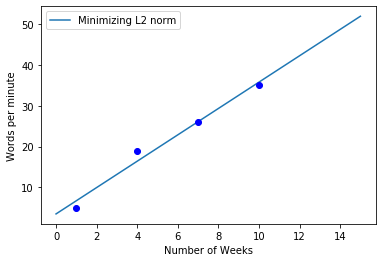

In [62]:
plt.plot(x,y1,label = "Minimizing L2 norm")
plt.plot([1,4,7,10],Y,"bo")
plt.xlabel("Number of Weeks")
plt.ylabel("Words per minute")
plt.legend()
plt.show()

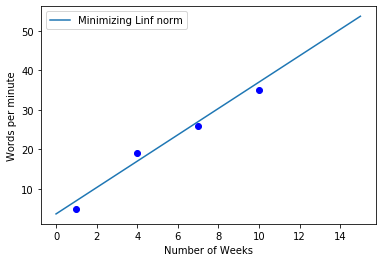

In [63]:
plt.plot(x,y2,label = "Minimizing Linf norm")
plt.plot([1,4,7,10],Y,"bo")
plt.xlabel("Number of Weeks")
plt.ylabel("Words per minute")
plt.legend()
plt.show()

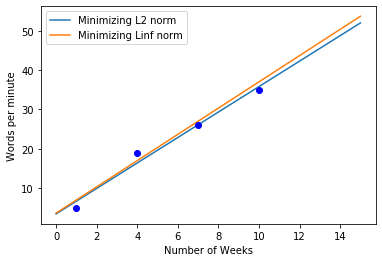

In [64]:
plt.plot(x,y1,label = "Minimizing L2 norm")
plt.plot(x,y2,label = "Minimizing Linf norm")
plt.plot([1,4,7,10],Y,"bo")
plt.xlabel("Number of Weeks")
plt.ylabel("Words per minute")
plt.legend()
plt.show()

In [24]:
x = np.linspace(0,20,50)
y = np.linspace(0,20,50)
z = np.identity(50)
for i in range(0,50):
    for j in range(0,50):
        if x[i]>10 and y[j] < 5:
            z[i,j] = (x[i]**2+y[j]**2)
        else:
            z[i,j] = (x[i]**2+2*y[j])

In [11]:
from mpl_toolkits import mplot3d

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
len(z)

2500

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [26]:
X,Y = np.meshgrid(x,y)

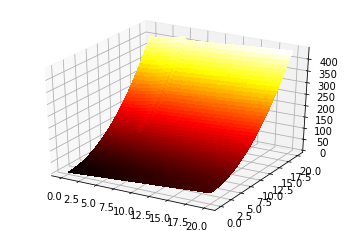

In [28]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, z, rstride=1, cstride=1, cmap='hot', linewidth=0, antialiased=False)

In [79]:
a = np.array([0,0])

In [80]:
X

array([[ 1,  1],
       [ 4,  1],
       [ 7,  1],
       [10,  1]])

In [81]:
Y

array([ 5, 19, 26, 35])

In [82]:
2*np.dot(np.dot(X.T,X),a) - 2*np.dot(X.T,Y)
a = a-0.001*(2*np.dot(np.dot(X.T,X),a) - 2*np.dot(X.T,Y))
a

array([1.226, 0.17 ])

In [83]:
for i in range(100):
    a = a - 0.002*(2*np.dot(np.dot(X.T,X),a) - 2*np.dot(X.T,Y))

In [84]:
a

array([3.23887726, 3.42510371])